$$ u_{t}+2 u_{x} =0 ,$$ for $0\leq t \leq 1,$ $0\leq x \leq 1 $
$$ u(0,x) = u_{0}(x) =  \begin{cases} 
      10^4 (0.1-x)^2 (0.2-x)^2 &  0 < x <  0.2 \\
      0 &  otherwise
   \end{cases}  $$
   with wind coefficient $\alpha = 2 $ , $Nt = 100$ ,$Nx = 250$ resulting to Courant number $v = 0.4$ and additional for $Nt = 100,Nx = 200$ with $v =0.5$

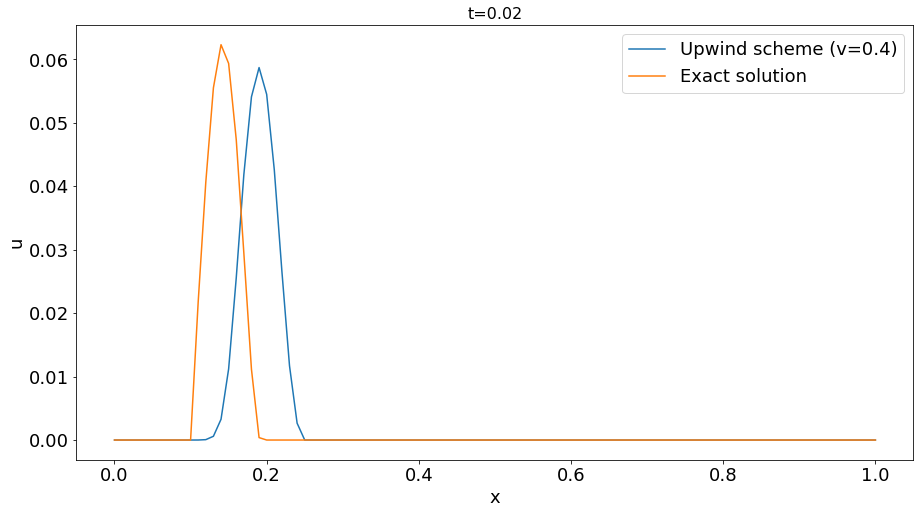

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams.update({'font.size': 18})



Nx = 101;                         # Number of grid points
xmax = 1.;                        # Domain limit to the right
xmin = 0.;                        # Domain limit to the left
dx = (xmax-xmin)/(Nx-1)           # Mesh size
x = np.linspace(xmin,xmax,Nx)     # Discretized mesh
dt = 1/250                        # Time step
t_end = 0.02                      # Final time
Nt = int(t_end/dt)                # Number of iterations
t = np.linspace(0.,t_end,Nt+1)    # Time vector
a = 2.                            # Advection speed
v = dt/dx                         # v number
U = np.zeros((Nt+1,Nx))           # u^n_i
U[0,:] = np.where( (0.1<x) & (x<0.2) , ((10**4)*(0.1-x)**2 *((0.2-x)**2)),0) # Initial solution
Uex = U[0,:]                      # Exact solution


for n in range (0,Nt):
    if (a>0.):
        for i in range (1,Nx):
            U[n+1,i] = U[n,i] - a*v*(U[n,i]-U[n,i-1]);
        U[n+1,0] = U[n+1,Nx-1];
    else:
        for i in range (0,Nx-1):
            U[n+1,i] = U[n,i] - a*v*(U[n,i+1]-U[n,i]);
        U[n+1,Nx-1] = U[n,0];

        


Uex = np.where( (0.1<x) & (x<0.2) , ((10**4)*(0.1-x-a*dt)**2 *((0.2-x-a*dt)**2)),0)

  



plt.plot(x,U[n+1,:])
plt.plot(x,Uex)
plt.gca().legend(('Upwind scheme (v='+str(v)+')','Exact solution'))

plt.title('t='+str(dt*(n+1)),fontsize=16)
plt.xlabel('x',fontsize=18)
plt.ylabel('u',fontsize=18)

plt.show()



